<a href="https://colab.research.google.com/github/v4vraj/Fraud-Detection_ML/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# Import all the necessary libraries
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [92]:
# Load the dataset
df = pd.read_csv("/content/synthetic_fraud_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [93]:
# Encode categorical variables
label_cols = ['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Card_Type', 'Authentication_Method']
label_encoders = {}

In [94]:
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Extract features from Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Transaction_Hour'] = df['Timestamp'].dt.hour
df['Transaction_Day'] = df['Timestamp'].dt.day
df['Transaction_Weekday'] = df['Timestamp'].dt.weekday

# Drop unused columns
df.drop(columns=['Timestamp', 'Transaction_ID', 'User_ID'], inplace=True)

In [95]:
# Normalize numerical features
scale_cols = ['Transaction_Amount', 'Account_Balance', 'Avg_Transaction_Amount_7d',
              'Transaction_Distance', 'Risk_Score', 'Card_Age']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

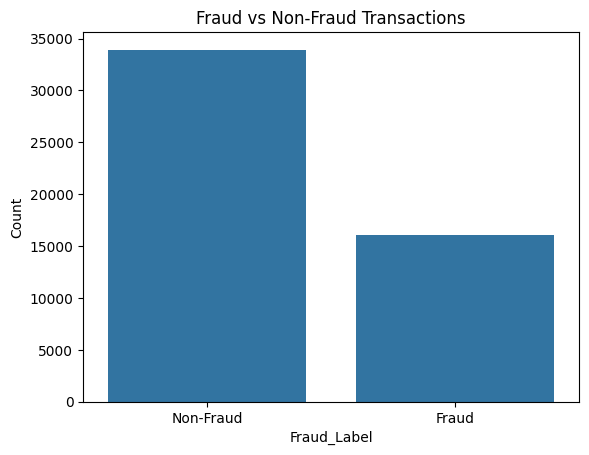

In [96]:
# Fraud vs Non-Fraud Transactions
sns.countplot(data=df, x='Fraud_Label')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylabel('Count')
plt.show()

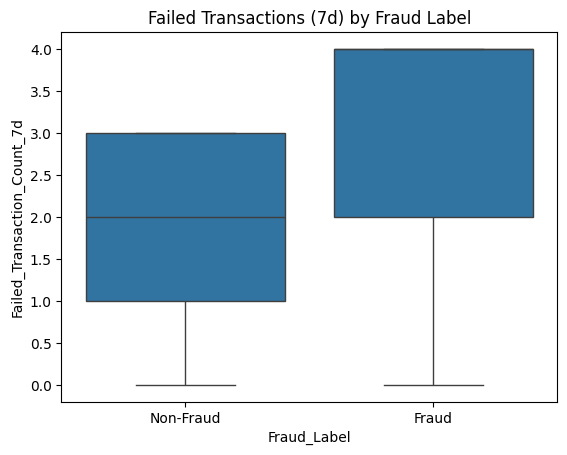

In [97]:
sns.boxplot(data=df, x='Fraud_Label', y='Failed_Transaction_Count_7d')
plt.title('Failed Transactions (7d) by Fraud Label')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

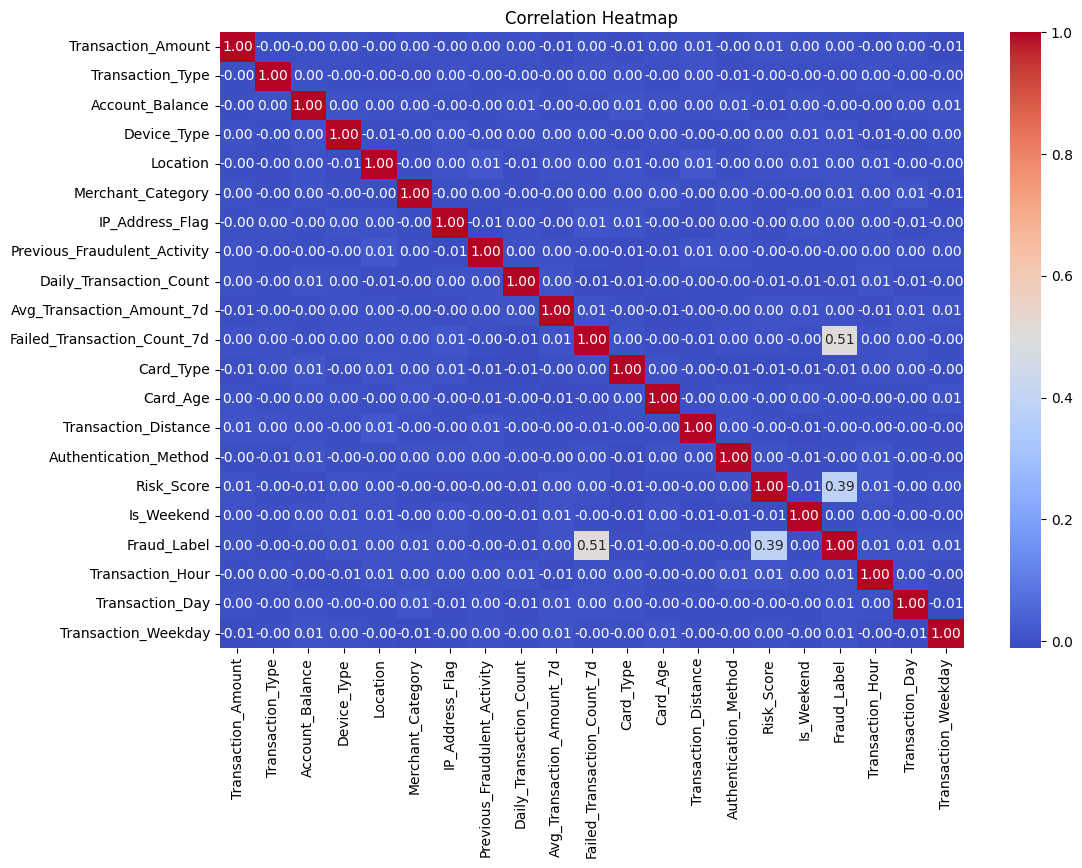

In [98]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

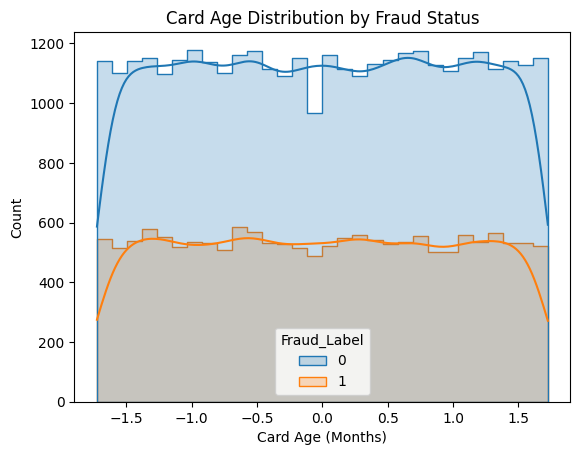

In [99]:
sns.histplot(data=df, x='Card_Age', hue='Fraud_Label', bins=30, kde=True, element='step')
plt.title('Card Age Distribution by Fraud Status')
plt.xlabel('Card Age (Months)')
plt.show()

In [100]:
# Handle class imbalance with SMOTE
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

In [101]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [102]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

#Logistic Regression

In [103]:
# Train Logistic Regression
# reg = linear_model.LinearRegression()
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# XGBoost

In [104]:
# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# Random Forest Classifier

In [105]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [106]:
# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[10059    92]
 [  317  9892]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     10151
           1       0.99      0.97      0.98     10209

    accuracy                           0.98     20360
   macro avg       0.98      0.98      0.98     20360
weighted avg       0.98      0.98      0.98     20360

